In [742]:
import numpy as np
import pandas as pd

In [743]:
afks_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/AFKS.ME.csv'
agro_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/AGRO.ME.csv'
alrs_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/ALRS.ME.csv'
chmf_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/CHMF.ME.csv'
dsky_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/DSKY.ME.csv'
fesh_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/FESH.ME.csv'
five_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/FIVE.ME.csv'
gazp_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/GAZP.ME.csv'
lnta_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/LNTA.ME.csv'
mdmg_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/MDMG.ME.csv'
mgnt_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/MGNT.ME.csv'
moex_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/MOEX.ME.csv'
mvid_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/MVID.ME.csv'
nlmk_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/NLMK.ME.csv'
pikk_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/PIKK.ME.csv'
poly_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/POLY.ME.csv'
rtkm_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/RTKM.ME.csv'
sber_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/SBER.ME.csv'
tcsg_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/TCSG.ME.csv'
ttlk_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/TTLK.ME.csv'
yndx_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/YNDX.ME.csv'
imoex_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/IMOEX.ME.csv'
laplas = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/LaplaseTable.csv'
q_url = 'https://raw.githubusercontent.com/IgorLukhnev/MatStatProject/main/q_table.csv'

In [744]:
afks = pd.read_csv(afks_url)
agro = pd.read_csv(agro_url)
alrs = pd.read_csv(alrs_url)
chmf = pd.read_csv(chmf_url)
dsky = pd.read_csv(dsky_url)
fesh = pd.read_csv(fesh_url)
five = pd.read_csv(five_url)
gazp = pd.read_csv(gazp_url)
lnta = pd.read_csv(lnta_url)
mgnt = pd.read_csv(mgnt_url)
moex = pd.read_csv(moex_url)
mvid = pd.read_csv(mvid_url)
nlmk = pd.read_csv(nlmk_url)
pikk = pd.read_csv(pikk_url)
poly = pd.read_csv(poly_url)
rtkm = pd.read_csv(rtkm_url)
sber = pd.read_csv(sber_url)
tcsg = pd.read_csv(tcsg_url)
ttlk = pd.read_csv(ttlk_url)
yndx = pd.read_csv(yndx_url)
imoex = pd.read_csv(imoex_url)

In [745]:
imoex = imoex.fillna(1)

In [746]:
start_date = pd.to_datetime("2020-10-25")

In [747]:
companies = [afks, agro, alrs, chmf, dsky, five, gazp, lnta, mgnt, moex, mvid, nlmk, pikk, poly, rtkm, sber, tcsg, ttlk, yndx, imoex]

In [748]:
def covariation(X, Y):
    T = X.shape[0]
    X = X.to_numpy()
    Y = Y.to_numpy()
    return ((X - X.mean()) * (Y - Y.mean())).sum()/(T - 1)

In [749]:
m_i = []
std_i = []
cov_i = []
beta_i = []
alpha_i = []
psi_i = []
for comp in companies:
    comp.Date = pd.to_datetime(comp.Date)
    comp['Profitability'] = 100 * (comp['Close'] - comp['Open'])/comp['Open']
    mi = comp['Profitability'][comp.Date > start_date].mean()
    m_i.append(mi)
    std_i.append(comp['Profitability'][comp.Date > start_date].std())
    covi = covariation(comp['Profitability'][comp.Date > start_date], ((companies[-1]['Close'] - companies[-1]['Open'])/companies[-1]['Open'])[comp.Date > start_date])
    cov_i.append(covi)
    betai = covi/(std_i[-1] ** 2)
    beta_i.append(betai)
    alphai = mi - betai * ((companies[-1]['Close'] - companies[-1]['Open'])/companies[-1]['Open'])[comp.Date > start_date].mean()
    alpha_i.append(alphai)
    psii = ((comp['Profitability'][comp.Date > start_date] - alphai - betai * ((companies[-1]['Close'] - companies[-1]['Open'])/companies[-1]['Open'])[comp.Date > start_date])**2).sum()/(comp.shape[0] - 2)
    psi_i.append(psii)

In [750]:
m_o = []
s_o = []
for i in range(len(companies) - 1):
    m_o.append(alpha_i[i] + beta_i[i] * m_i[-1])
    s_o.append((beta_i[i]**2 * std_i[-1]**2 + psi_i[i])**(1/2))

In [751]:
m_o # точечные оценки ожидаемой ежедневной доходности по модели Шарпа

[-0.04319197671026865,
 0.0001461726608667479,
 0.1894838122080495,
 0.054481657662297005,
 0.18388417147484407,
 -0.37779525308502754,
 0.24563954441675825,
 0.08359276182812996,
 -0.11562299186287471,
 0.08227666081802218,
 0.11171738748315668,
 -0.07809163806915223,
 0.16064546225383977,
 -0.46569952843536533,
 -0.0645218596912533,
 0.10639269401290023,
 0.3807834207355831,
 0.1569047357492033,
 -0.10455593746717488]

In [752]:
s_o

[1.0261708583466844,
 0.7980143639925299,
 1.002097687127611,
 0.843067995767871,
 1.1272706622662874,
 0.8816311069131941,
 0.8229183092585969,
 0.926798539625493,
 0.8610278660372573,
 0.9312190746806104,
 1.0207089107376328,
 1.0335437752164174,
 0.838459904777277,
 1.4145422822421183,
 0.5560376687519333,
 0.8832434035209092,
 1.7425441887030013,
 1.2474106689627869,
 0.8845765818280805]

In [753]:
m_i

[-0.04340403816516491,
 -0.00011061768065527833,
 0.18917047253760888,
 0.05425896722037366,
 0.18387807016644228,
 -0.37809859520852723,
 0.2450167670167331,
 0.08336663595603686,
 -0.11593421991530875,
 0.08201223923749511,
 0.11171276913641487,
 -0.07834440885862036,
 0.16053189731962544,
 -0.465816126833889,
 -0.0648813177756786,
 0.10585835239965047,
 0.3806709952597875,
 0.1567136173009297,
 -0.10479986105606232,
 0.12603286265036384]

In [754]:
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
import statsmodels.api as sm
import pylab
from scipy.stats import kstest


def is_normal(x):
    ans = []
    data = x['Profitability'][x.Date > start_date]
    stat, p = shapiro(data)
    stat1, p1 = normaltest(data)
    result = anderson(data)
    ks_statistic, p_value = kstest(data, 'norm')
    alpha = 0.05
    print("----Shapiro test-----")
    if p > alpha:
        ans.append(1)
        print(f'Sample looks Gaussian (fail to reject H0) with p={p}')
    else:
        ans.append(0)
        print(f'Sample does not look Gaussian (reject H0) with p={p}')
    print("----D'Agostino test-----")
    if p1 > alpha:
        ans.append(1)
        print(f'Sample looks Gaussian (fail to reject H0) with p={p1}')
    else:
        ans.append(0)
        print(f'Sample does not look Gaussian (reject H0) with p={p1}')
    print("----Kolmagorov-Smirnov test-----")
    if p_value > alpha:
        ans.append(1)
        print(f'Sample looks Gaussian (fail to reject H0) with p={p_value}')
    else:
        ans.append(0)
        print(f'Sample does not look Gaussian (reject H0) with p={p_value}')
    print("----D'Agostino test-----")
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            ans.append(1)
            print(f'Data looks normal (fail to reject H0) {sl} {cv}')
        else:
            ans.append(0)
            print(f'Data does not look normal (reject H0) {sl} {cv}')
    sm.qqplot(x['Profitability'][x.Date > start_date], line='45')
    pylab.show()
    if any(ans):
        return 1
    else:
        return 0

----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.07670065760612488
----D'Agostino test-----
Sample does not look Gaussian (reject H0) with p=0.03159131995836749
----Kolmagorov-Smirnov test-----
Sample does not look Gaussian (reject H0) with p=0.036175612619512874
----D'Agostino test-----
Data looks normal (fail to reject H0) 15.0 0.552
Data looks normal (fail to reject H0) 10.0 0.629
Data looks normal (fail to reject H0) 5.0 0.754
Data looks normal (fail to reject H0) 2.5 0.88
Data looks normal (fail to reject H0) 1.0 1.046


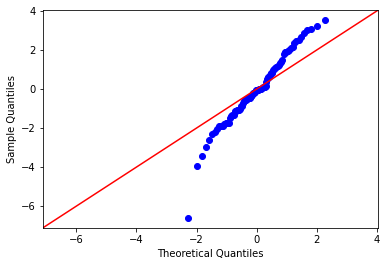

----Shapiro test-----
Sample does not look Gaussian (reject H0) with p=0.01977941393852234
----D'Agostino test-----
Sample looks Gaussian (fail to reject H0) with p=0.05651486024492752
----Kolmagorov-Smirnov test-----
Sample looks Gaussian (fail to reject H0) with p=0.2923697637418371
----D'Agostino test-----
Data does not look normal (reject H0) 15.0 0.552
Data does not look normal (reject H0) 10.0 0.629
Data does not look normal (reject H0) 5.0 0.754
Data does not look normal (reject H0) 2.5 0.88
Data does not look normal (reject H0) 1.0 1.046


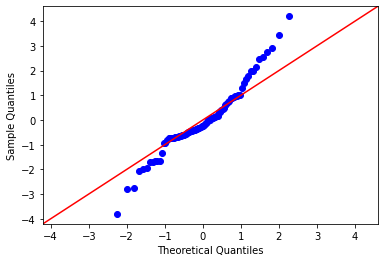

----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.052704863250255585
----D'Agostino test-----
Sample does not look Gaussian (reject H0) with p=0.025881885582581816
----Kolmagorov-Smirnov test-----
Sample looks Gaussian (fail to reject H0) with p=0.16292213064743838
----D'Agostino test-----
Data does not look normal (reject H0) 15.0 0.552
Data does not look normal (reject H0) 10.0 0.629
Data does not look normal (reject H0) 5.0 0.754
Data looks normal (fail to reject H0) 2.5 0.88
Data looks normal (fail to reject H0) 1.0 1.046


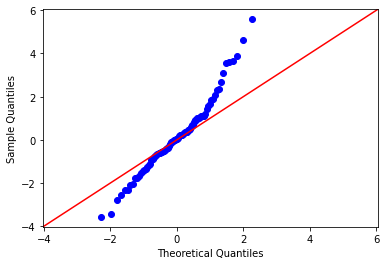

----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.7563880681991577
----D'Agostino test-----
Sample looks Gaussian (fail to reject H0) with p=0.558448961339592
----Kolmagorov-Smirnov test-----
Sample looks Gaussian (fail to reject H0) with p=0.25570241433045376
----D'Agostino test-----
Data looks normal (fail to reject H0) 15.0 0.552
Data looks normal (fail to reject H0) 10.0 0.629
Data looks normal (fail to reject H0) 5.0 0.754
Data looks normal (fail to reject H0) 2.5 0.88
Data looks normal (fail to reject H0) 1.0 1.046


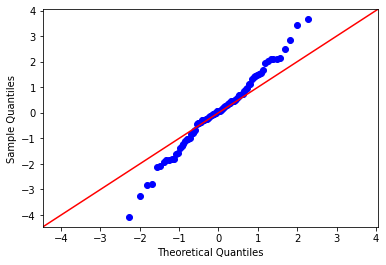

----Shapiro test-----
Sample does not look Gaussian (reject H0) with p=4.743197479228911e-08
----D'Agostino test-----
Sample does not look Gaussian (reject H0) with p=2.549739273312607e-14
----Kolmagorov-Smirnov test-----
Sample looks Gaussian (fail to reject H0) with p=0.4608209332068907
----D'Agostino test-----
Data does not look normal (reject H0) 15.0 0.552
Data does not look normal (reject H0) 10.0 0.629
Data does not look normal (reject H0) 5.0 0.754
Data does not look normal (reject H0) 2.5 0.88
Data does not look normal (reject H0) 1.0 1.046


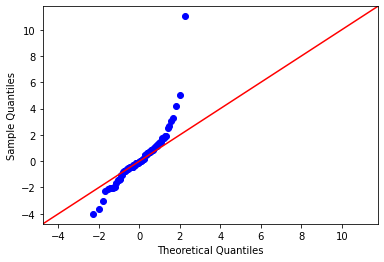

----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.20446088910102844
----D'Agostino test-----
Sample looks Gaussian (fail to reject H0) with p=0.19274929103326
----Kolmagorov-Smirnov test-----
Sample does not look Gaussian (reject H0) with p=0.00038729152805326485
----D'Agostino test-----
Data looks normal (fail to reject H0) 15.0 0.552
Data looks normal (fail to reject H0) 10.0 0.629
Data looks normal (fail to reject H0) 5.0 0.754
Data looks normal (fail to reject H0) 2.5 0.88
Data looks normal (fail to reject H0) 1.0 1.046


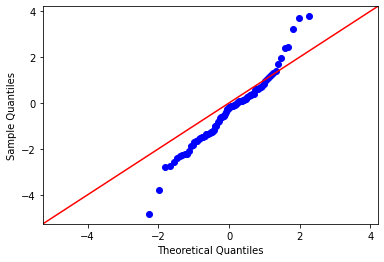

----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.610852062702179
----D'Agostino test-----
Sample looks Gaussian (fail to reject H0) with p=0.6922988943550403
----Kolmagorov-Smirnov test-----
Sample looks Gaussian (fail to reject H0) with p=0.10702909593565645
----D'Agostino test-----
Data looks normal (fail to reject H0) 15.0 0.552
Data looks normal (fail to reject H0) 10.0 0.629
Data looks normal (fail to reject H0) 5.0 0.754
Data looks normal (fail to reject H0) 2.5 0.88
Data looks normal (fail to reject H0) 1.0 1.046


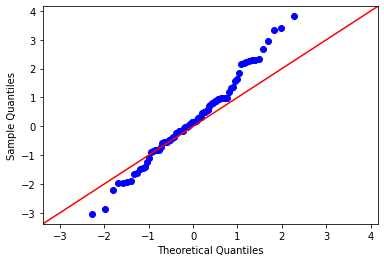

----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.19657287001609802
----D'Agostino test-----
Sample looks Gaussian (fail to reject H0) with p=0.3443999821215132
----Kolmagorov-Smirnov test-----
Sample does not look Gaussian (reject H0) with p=0.034819592356946615
----D'Agostino test-----
Data does not look normal (reject H0) 15.0 0.552
Data looks normal (fail to reject H0) 10.0 0.629
Data looks normal (fail to reject H0) 5.0 0.754
Data looks normal (fail to reject H0) 2.5 0.88
Data looks normal (fail to reject H0) 1.0 1.046


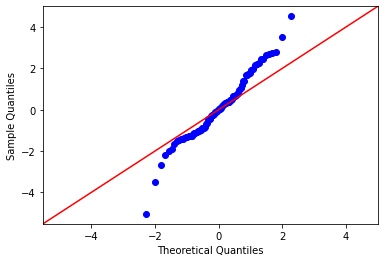

----Shapiro test-----
Sample does not look Gaussian (reject H0) with p=0.0020822612568736076
----D'Agostino test-----
Sample does not look Gaussian (reject H0) with p=1.18617650423687e-05
----Kolmagorov-Smirnov test-----
Sample looks Gaussian (fail to reject H0) with p=0.21668568341654693
----D'Agostino test-----
Data looks normal (fail to reject H0) 15.0 0.552
Data looks normal (fail to reject H0) 10.0 0.629
Data looks normal (fail to reject H0) 5.0 0.754
Data looks normal (fail to reject H0) 2.5 0.88
Data looks normal (fail to reject H0) 1.0 1.046


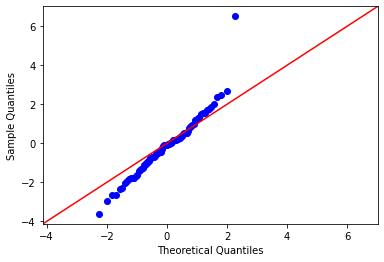

----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.9241252541542053
----D'Agostino test-----
Sample looks Gaussian (fail to reject H0) with p=0.8061973461722005
----Kolmagorov-Smirnov test-----
Sample looks Gaussian (fail to reject H0) with p=0.0637484171917109
----D'Agostino test-----
Data looks normal (fail to reject H0) 15.0 0.552
Data looks normal (fail to reject H0) 10.0 0.629
Data looks normal (fail to reject H0) 5.0 0.754
Data looks normal (fail to reject H0) 2.5 0.88
Data looks normal (fail to reject H0) 1.0 1.046


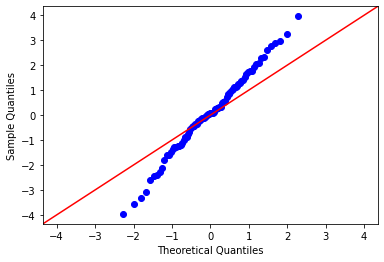

----Shapiro test-----
Sample does not look Gaussian (reject H0) with p=8.77548359312641e-07
----D'Agostino test-----
Sample does not look Gaussian (reject H0) with p=2.358461060690486e-10
----Kolmagorov-Smirnov test-----
Sample looks Gaussian (fail to reject H0) with p=0.09959257082661478
----D'Agostino test-----
Data does not look normal (reject H0) 15.0 0.552
Data does not look normal (reject H0) 10.0 0.629
Data does not look normal (reject H0) 5.0 0.754
Data does not look normal (reject H0) 2.5 0.88
Data does not look normal (reject H0) 1.0 1.046


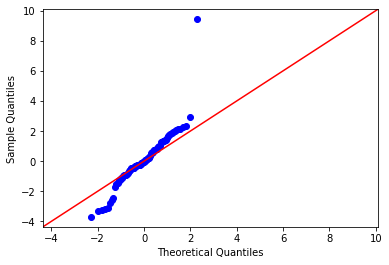

----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.41685497760772705
----D'Agostino test-----
Sample looks Gaussian (fail to reject H0) with p=0.4532732780762303
----Kolmagorov-Smirnov test-----
Sample does not look Gaussian (reject H0) with p=0.03103069459614955
----D'Agostino test-----
Data looks normal (fail to reject H0) 15.0 0.552
Data looks normal (fail to reject H0) 10.0 0.629
Data looks normal (fail to reject H0) 5.0 0.754
Data looks normal (fail to reject H0) 2.5 0.88
Data looks normal (fail to reject H0) 1.0 1.046


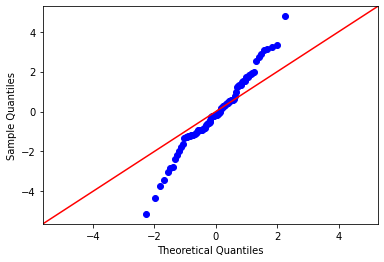

----Shapiro test-----
Sample does not look Gaussian (reject H0) with p=3.9662327253608964e-06
----D'Agostino test-----
Sample does not look Gaussian (reject H0) with p=4.189264494080463e-07
----Kolmagorov-Smirnov test-----
Sample looks Gaussian (fail to reject H0) with p=0.5359061060604919
----D'Agostino test-----
Data does not look normal (reject H0) 15.0 0.552
Data does not look normal (reject H0) 10.0 0.629
Data does not look normal (reject H0) 5.0 0.754
Data does not look normal (reject H0) 2.5 0.88
Data does not look normal (reject H0) 1.0 1.046


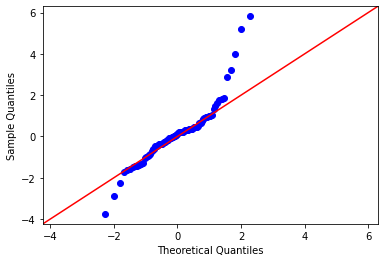

----Shapiro test-----
Sample does not look Gaussian (reject H0) with p=4.376977642550628e-07
----D'Agostino test-----
Sample does not look Gaussian (reject H0) with p=2.137359505555793e-11
----Kolmagorov-Smirnov test-----
Sample does not look Gaussian (reject H0) with p=0.0001486044356348554
----D'Agostino test-----
Data does not look normal (reject H0) 15.0 0.552
Data does not look normal (reject H0) 10.0 0.629
Data does not look normal (reject H0) 5.0 0.754
Data does not look normal (reject H0) 2.5 0.88
Data does not look normal (reject H0) 1.0 1.046


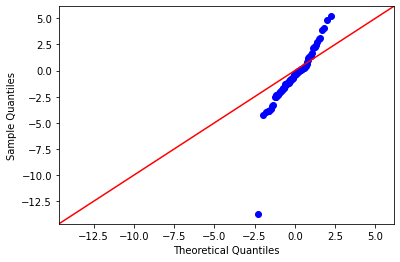

----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.09588716179132462
----D'Agostino test-----
Sample does not look Gaussian (reject H0) with p=0.020836777725595616
----Kolmagorov-Smirnov test-----
Sample looks Gaussian (fail to reject H0) with p=0.10222882155141712
----D'Agostino test-----
Data does not look normal (reject H0) 15.0 0.552
Data does not look normal (reject H0) 10.0 0.629
Data looks normal (fail to reject H0) 5.0 0.754
Data looks normal (fail to reject H0) 2.5 0.88
Data looks normal (fail to reject H0) 1.0 1.046


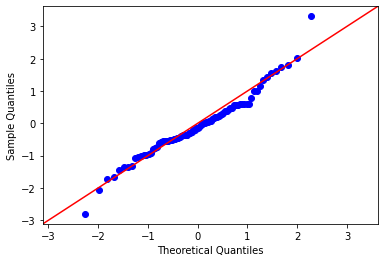

----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.14971408247947693
----D'Agostino test-----
Sample looks Gaussian (fail to reject H0) with p=0.10626617364152617
----Kolmagorov-Smirnov test-----
Sample looks Gaussian (fail to reject H0) with p=0.08258658463094525
----D'Agostino test-----
Data looks normal (fail to reject H0) 15.0 0.552
Data looks normal (fail to reject H0) 10.0 0.629
Data looks normal (fail to reject H0) 5.0 0.754
Data looks normal (fail to reject H0) 2.5 0.88
Data looks normal (fail to reject H0) 1.0 1.046


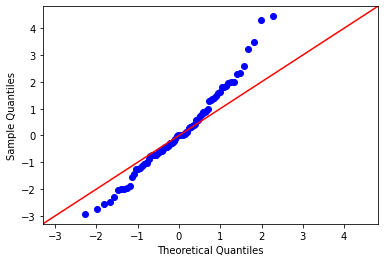

----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.34488627314567566
----D'Agostino test-----
Sample looks Gaussian (fail to reject H0) with p=0.1159772345287376
----Kolmagorov-Smirnov test-----
Sample does not look Gaussian (reject H0) with p=3.1549718293470955e-06
----D'Agostino test-----
Data looks normal (fail to reject H0) 15.0 0.552
Data looks normal (fail to reject H0) 10.0 0.629
Data looks normal (fail to reject H0) 5.0 0.754
Data looks normal (fail to reject H0) 2.5 0.88
Data looks normal (fail to reject H0) 1.0 1.046


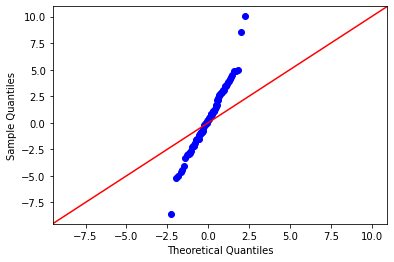

----Shapiro test-----
Sample does not look Gaussian (reject H0) with p=0.0006804786971770227
----D'Agostino test-----
Sample does not look Gaussian (reject H0) with p=0.00042113068072715127
----Kolmagorov-Smirnov test-----
Sample does not look Gaussian (reject H0) with p=0.04080576884083339
----D'Agostino test-----
Data does not look normal (reject H0) 15.0 0.552
Data does not look normal (reject H0) 10.0 0.629
Data does not look normal (reject H0) 5.0 0.754
Data does not look normal (reject H0) 2.5 0.88
Data does not look normal (reject H0) 1.0 1.046


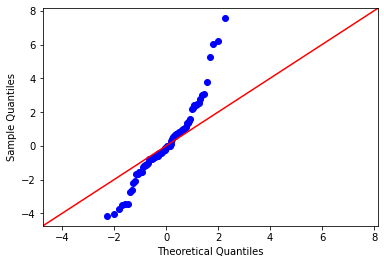

----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.3636031448841095
----D'Agostino test-----
Sample looks Gaussian (fail to reject H0) with p=0.18219409650463797
----Kolmagorov-Smirnov test-----
Sample does not look Gaussian (reject H0) with p=0.040465941942846764
----D'Agostino test-----
Data looks normal (fail to reject H0) 15.0 0.552
Data looks normal (fail to reject H0) 10.0 0.629
Data looks normal (fail to reject H0) 5.0 0.754
Data looks normal (fail to reject H0) 2.5 0.88
Data looks normal (fail to reject H0) 1.0 1.046


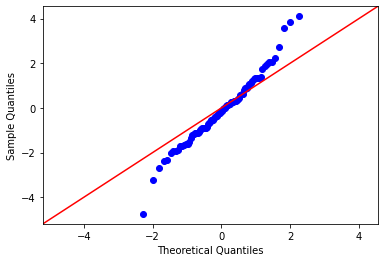

----Shapiro test-----
Sample looks Gaussian (fail to reject H0) with p=0.9041133522987366
----D'Agostino test-----
Sample looks Gaussian (fail to reject H0) with p=0.8041726803037575
----Kolmagorov-Smirnov test-----
Sample looks Gaussian (fail to reject H0) with p=0.42301455613038813
----D'Agostino test-----
Data looks normal (fail to reject H0) 15.0 0.552
Data looks normal (fail to reject H0) 10.0 0.629
Data looks normal (fail to reject H0) 5.0 0.754
Data looks normal (fail to reject H0) 2.5 0.88
Data looks normal (fail to reject H0) 1.0 1.046


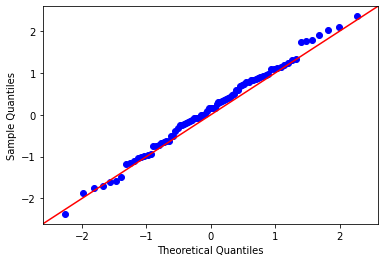

Вероятно, нужно изменить объем выборки (сейчас с: 2020-10-25 00:00:00)


In [755]:
norm = []
for i in range(20):
    norm.append(is_normal(companies[i]))
if all(norm):
    print(f'Данные о доходности всех компаний распределены нормально')
else:
    print(f'Вероятно, нужно изменить объем выборки (сейчас с: {start_date})')

In [756]:
laplas_table = pd.read_csv(laplas, sep=';')
q_table = pd.read_csv(q_url, sep=';')
def confidence_intervals(x, gamma=0.95):
    data = x['Profitability'][x.Date > start_date]
    s = data.std()
    m = data.mean()
    n = data.shape[0]
    temp = abs(laplas_table['F(x)'] - gamma/2)
    t = laplas_table[temp == temp.min()]['x'].iloc[0]
    precision = t * (s/n**(1/2))
    temp_q = abs(q_table['n']-n)
    q = q_table[temp_q == temp_q.min()][f'{gamma}'].iloc[0]
    return (m - precision, m + precision), (s*(1-q), s*(1+q))

In [757]:
[afks, agro, alrs, chmf, dsky, five, gazp, lnta, mgnt, moex, mvid, nlmk, pikk, poly, rtkm, sber, tcsg, ttlk, yndx, imoex]
labels = ["АФК Система", "РусАгро", "Алроса", "Северсталь", "Детский мир", "Х5 груп", "Газпром", "Лента", "Магнит", "Московская биржа", "МВидео", "НЛМК", "ПИК", "Polymetal", "РосТелеКом", "Сбербанк", "TCS Group", "Яндекс", "Индекс Мосбиржи"]
gamma = 0.95
print(f'Для уровня значимости: {gamma}')
for i in range(len(companies) - 1):
    m, s = confidence_intervals(companies[i], gamma=gamma)
    print(f'Компания: {labels[i]} ожидаемая доходность в интервале {m} риск в интервале {s}')

Для уровня значимости: 0.95
Компания: АФК Система ожидаемая доходность в интервале (-0.4182502642195942, 0.3314421878892644) риск в интервале (1.479341685199158, 2.0470985655735667)
Компания: РусАгро ожидаемая доходность в интервале (-0.2916142103587698, 0.2913929749974592) риск в интервале (1.150427524836368, 1.5919503651192175)
Компания: Алроса ожидаемая доходность в интервале (-0.17688275690074745, 0.5552237019759652) риск в интервале (1.4446398647516363, 1.9990785255979142)
Компания: Северсталь ожидаемая доходность в интервале (-0.2537021032157981, 0.3622200376565454) риск в интервале (1.21537744613342, 1.6818274314194286)
Компания: Детский мир ожидаемая доходность в интервале (-0.22789791124833783, 0.5956540515812224) риск в интервале (1.6250860537734897, 2.2487781983683215)
Компания: Х5 груп ожидаемая доходность в интервале (-0.7001466119246195, -0.056050578492435) риск в интервале (1.2709719950459162, 1.7587586248489973)
Компания: Газпром ожидаемая доходность в интервале (-0.055

In [758]:
z = zip(companies, labels, range(len(labels)))
rating = dict()
for comp, lab, i in z:
    m_w = (1 + m_o[i])**5 - 1
    rating[lab] = m_w
res = sorted(rating, key=lambda x: rating[x], reverse=True)
for c in res:
    print(f"{c}: {rating[c]}")

TCS Group: 4.0191227697859135
Газпром: 1.9988996605996032
Алроса: 1.381182489961538
Детский мир: 1.3256591811982577
ПИК: 1.1061916610591482
Яндекс: 1.0724687668392177
МВидео: 0.698134130340295
Сбербанк: 0.6578548204134662
Лента: 0.4939307854737316
Московская биржа: 0.48488036732425077
Северсталь: 0.3037524834700174
РусАгро: 0.000731077000035496
АФК Система: -0.19809293058607458
РосТелеКом: -0.2835791475677294
НЛМК: -0.33405437404054494
Индекс Мосбиржи: -0.4243052015381422
Магнит: -0.45901251708280943
Х5 груп: -0.9067461865626333
Polymetal: -0.9564560535296398


In [759]:
def chosen(companies, res, cutting_edge=0.2):
    portfel = pd.DataFrame([])
    m = []
    for c in res:
        if rating[c] > cutting_edge:
            portfel[c] = companies[labels.index(c)]['Profitability']
            m.append([m_o[labels.index(c)]])
    return portfel, m

In [760]:
# def marcovic(m_0):
#     ch = chosen(companies, res)
#     V = ch[0].cov()
#     m_ = np.array(ch[1]).T
#     I = np.ones((len(ch[1]), 1))
#     a11 = np.dot(np.dot(I.T, np.linalg.inv(V)), I)
#     a12 = np.dot(np.dot(I.T, np.linalg.inv(V)), m_)
#     a22 = np.dot(np.dot(m_.T, np.linalg.inv(V)), m_)
#     d = np.dot(a11, a22) - np.dot(a12, a12)
#     b = np.linalg.inv(d) * (a22 * np.dot(np.linalg.inv(V), I) - a12 * np.dot(np.linalg.inv(V), m_))
#     c = np.linalg.inv(d) * (a11 * np.dot(np.linalg.inv(V), m_) - a22 * np.dot(np.linalg.inv(V), I))
#     return b + m_0 * c

In [761]:
def marcovic(m_0):
    ch = chosen(companies, res)
    V = ch[0].cov()
    m_ = np.array(ch[1])
    I = np.ones((len(ch[1]), 1))
    V_ = np.linalg.inv(V)
    a = (np.dot(V_, m_) * m_).sum()
    b = (m_ * np.dot(V_, I)).sum()
    c = (I * np.dot(V_, I)).sum()
    v = np.dot(V_, (((c * m_0 - b)/(a*c-b**2)*m_) + (a - b * m_0)/(a * c - b**2)*I))
    s_p = np.dot(np.dot(v.T, V), v)
    return v, m_, s_p

In [762]:
v, m_, s_p = marcovic(0.25)
# Получены эффективные веса для потртфеля рисковых акций
s_p

array([[1.31100236]])